# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf # Library to construct neural newtorks. Low level library
from tensorflow import keras # High level library to handle tensorflow.
from tensorflow.keras.layers import Flatten, Dense, Dropout # Types of layers to use in our neural network. # Dense: to create hidden layers # Dropout: minimize overfitting

import warnings
warnings.filterwarnings("ignore")

print(tf.__version__)

2.12.0


In [2]:
data = pd.read_csv('tic-tac-toe.csv')
display(data.shape)
data.head()

(958, 10)

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [3]:
data['class'].value_counts() # imbalanced

True     626
False    332
Name: class, dtype: int64

In [4]:
data['TL'].unique() # example to check for the unique values

array(['x', 'o', 'b'], dtype=object)

Input-output split

In [5]:
X = data.drop(columns=['class'])
y = data['class']

In [6]:
display(X.shape)
X.head()

(958, 9)

,TL,TM,TR,ML,MM,MR,BL,BM,BR
0,x,x,x,x,o,o,x,o,o
1,x,x,x,x,o,o,o,x,o
2,x,x,x,x,o,o,o,o,x
3,x,x,x,x,o,o,o,b,b
4,x,x,x,x,o,o,b,o,b


In [7]:
y.head()

0    True
1    True
2    True
3    True
4    True
Name: class, dtype: bool

### Train-test split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=35)

### Encoding categorical data

In [9]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_train)

X_train_np = encoder.transform(X_train).toarray()
X_test_np  = encoder.transform(X_test).toarray()

X_train_oh_df = pd.DataFrame(X_train_np, columns=encoder.get_feature_names_out())
X_test_oh_df  = pd.DataFrame(X_test_np,  columns=encoder.get_feature_names_out())

display(X_train_oh_df)
display(X_test_oh_df)


,TL_o,TL_x,TM_o,TM_x,TR_o,TR_x,ML_o,ML_x,MM_o,MM_x,MR_o,MR_x,BL_o,BL_x,BM_o,BM_x,BR_o,BR_x
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
714,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
715,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
716,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,TL_o,TL_x,TM_o,TM_x,TR_o,TR_x,ML_o,ML_x,MM_o,MM_x,MR_o,MR_x,BL_o,BL_x,BM_o,BM_x,BR_o,BR_x
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
236,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
237,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
238,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [10]:
type(y_train)

pandas.core.series.Series

In [11]:
y_train.value_counts()

True     469
False    249
Name: class, dtype: int64

In [12]:
y_train_b = y_train.apply(lambda x: 1 if x == True else 0) # binarize the dependent variable

In [13]:
y_train_b.value_counts()

1    469
0    249
Name: class, dtype: int64

In [14]:
y_test_b = y_test.apply(lambda x: 1 if x == True else 0)
display(y_test_b.value_counts())
display(y_test.value_counts())

1    157
0     83
Name: class, dtype: int64

True     157
False     83
Name: class, dtype: int64

### Balance data in train set
- Adjust the balanced weight for the cost function to give more attention to the minority class.
- One benefit of using the balanced weight adjustment is that we can use the imbalanced data to build the model directly without oversampling or under-sampling before training the model.

[More info](https://medium.com/grabngoinfo/neural-network-model-balanced-weight-for-imbalanced-classification-in-keras-68d7b6c1462c)

In [15]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils import class_weight

sklearn_weights = class_weight.compute_class_weight(class_weight='balanced', classes = np.unique(y_train_b), y=y_train_b)
sklearn_weights

array([1.44176707, 0.76545842])

In [16]:
# Transform array to dictionary
sklearn_weights = dict(enumerate(sklearn_weights))
sklearn_weights

{0: 1.4417670682730923, 1: 0.7654584221748401}

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [17]:
from tensorflow.keras.callbacks import EarlyStopping # This callback allows you to stop the training if the validation error increases (if tends to overfitting)
from tensorflow.keras.callbacks import ModelCheckpoint # This callback allows you to save the model (create checkpoints: it's a temp file that stores the neural network - just in case there's a problem so you don't have to start form scratch)

early_stopping = EarlyStopping(patience=5)

model1 = keras.Sequential()

model1.add(Dense(units = 4,input_dim = X_train_oh_df.shape[1],activation='relu'))

# Adding a dropout layer with a 0.2 regularization parameter (it must be between [0,1) )
# percentage of the previous layer that are going to be switch off randomly
model1.add(Dropout(0.2))
model1.add(Dense(units = 3, activation='relu'))

# The activation function for the input and hidden layers is 'relu', a popular activation function with good performance. 
# The output activation function is 'sigmoid', which is used for binary classification.
model1.add(Dense(1, activation='sigmoid'))

In [18]:
#Compile model
model1.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 76        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 95
Trainable params: 95
Non-trainable params: 0
_________________________________________________________________


In [19]:
checkpoint_path = 'class-nn1.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [25]:
# if we don't store the model.fit we won't be able to access the metrics
history = model1.fit(
    X_train_oh_df, 
    y_train_b, 
    epochs=70, # Number of epochs. This value is det by trial an error
    validation_split=0.20, # Here the TRAIN set will be split in TRAIN = TRAIN_NEW + VALIDATION. TRAIN_NEW used for train and val for CV. Observations are place randomly if we don't fix the randome_state
    # also the starting the coefficients are started at random values
    batch_size=20, # How many samples to input in the network before updating the weights
    verbose=2, # To display the progress.
    callbacks=[early_stopping,checkpoint],
    class_weight=sklearn_weights # we use this to balance the data
)

Epoch 1/70

Epoch 1: saving model to class-nn1.hdf5
29/29 - 0s - loss: 0.4628 - accuracy: 0.7997 - val_loss: 0.4688 - val_accuracy: 0.8056 - 204ms/epoch - 7ms/step
Epoch 2/70

Epoch 2: saving model to class-nn1.hdf5
29/29 - 0s - loss: 0.4666 - accuracy: 0.7944 - val_loss: 0.4672 - val_accuracy: 0.8056 - 120ms/epoch - 4ms/step
Epoch 3/70

Epoch 3: saving model to class-nn1.hdf5
29/29 - 0s - loss: 0.4497 - accuracy: 0.8049 - val_loss: 0.4610 - val_accuracy: 0.8264 - 121ms/epoch - 4ms/step
Epoch 4/70

Epoch 4: saving model to class-nn1.hdf5
29/29 - 0s - loss: 0.4380 - accuracy: 0.8188 - val_loss: 0.4554 - val_accuracy: 0.8333 - 164ms/epoch - 6ms/step
Epoch 5/70

Epoch 5: saving model to class-nn1.hdf5
29/29 - 0s - loss: 0.4471 - accuracy: 0.8188 - val_loss: 0.4473 - val_accuracy: 0.8194 - 109ms/epoch - 4ms/step
Epoch 6/70

Epoch 6: saving model to class-nn1.hdf5
29/29 - 0s - loss: 0.4398 - accuracy: 0.8206 - val_loss: 0.4410 - val_accuracy: 0.8333 - 114ms/epoch - 4ms/step
Epoch 7/70

Epoc

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
def plot_metric(history, metric):
    train_metrics = history.history[metric] # Get the error metric for the TRAIN set
    val_metrics = history.history['val_'+metric] # Get the error metric for the VALIDATION set
    epochs = range(1, len(train_metrics) + 1) # range(1,6) -> 1,2,3,4,5
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.yscale('log')
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

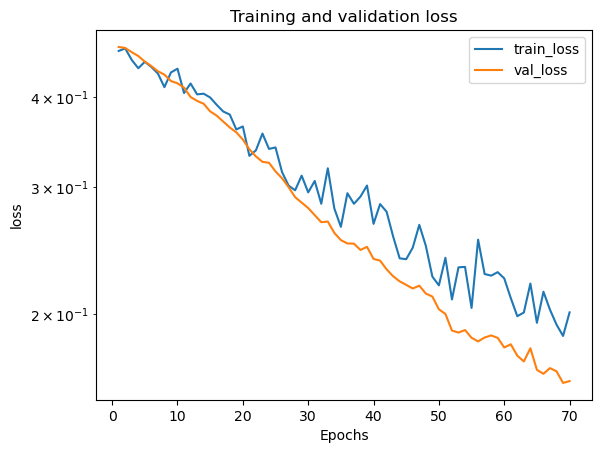

In [27]:
plot_metric(history,'loss')

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [41]:
# define function for computing the error metrics
from sklearn.metrics import recall_score, precision_score, cohen_kappa_score

def model_performance(y_train, y_pred_train, y_test, y_pred_test):

    recall_train = recall_score(y_train, y_pred_train)
    recall_test  = recall_score(y_test, y_pred_test)

    precision_train = precision_score(y_train,y_pred_train)
    precision_test  = precision_score(y_test,y_pred_test)

    kappa_train = cohen_kappa_score(y_train,y_pred_train)
    kappa_test  = cohen_kappa_score(y_test,y_pred_test)

    #R2_train = r2_score(y_train,y_pred_train)
    #R2_test  = r2_score(y_test,y_pred_test)

    performance = pd.DataFrame({'Error_metric': ['Precision','Recall','Kappa'],
                            'Train': [precision_train, recall_train, kappa_train],
                            'Test' : [precision_test , recall_test, kappa_test]})

    pd.options.display.float_format = '{:.3f}'.format

    df_train = pd.DataFrame({'Real': y_train.tolist(), 'Predicted': y_pred_train}) # .tolist()
    df_test  = pd.DataFrame({'Real': y_test.tolist(),  'Predicted': y_pred_test}) # .tolist()

    return performance, df_train, df_test


In [28]:
y_pred_train_nn1 = model1.predict(X_train_oh_df)
y_pred_test_nn1  = model1.predict(X_test_oh_df)

y_train = np.array(y_train_b).reshape(-1,1) # (nrows,) ->(nrows,1)
y_test  = np.array(y_test_b).reshape(-1,1)

8/8 [==============================] - 0s 1ms/step


In [39]:
y_pred_train_nn1_bi =  [1 if i>0.5 else 0 for i in y_pred_train_nn1]
y_pred_test_nn1_bi = [1 if i>0.5 else 0 for i in y_pred_test_nn1]

In [36]:
type(y_pred_train_nn1_bi)

list

In [37]:
df_train = pd.DataFrame({'Real': y_train.tolist(), 'Predicted': y_pred_train_nn1_bi})
df_train

,Real,Predicted
0,[0],0
1,[0],0
2,[0],0
3,[0],0
4,[1],1
...,...,...
713,[1],1
714,[1],1
715,[0],1
716,[1],1


In [38]:
df_train.describe()

,Predicted
count,718.000000
mean,0.664345
std,0.472548
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [42]:
results, df1, df2 = model_performance(y_train, y_pred_train_nn1_bi, y_test, y_pred_test_nn1_bi)
results

,Error_metric,Train,Test
0,Precision,0.979,0.981
1,Recall,0.996,0.994
2,Kappa,0.963,0.963


In [43]:
# Check the model performance
print(classification_report(y_test, y_pred_test_nn1_bi))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98        83
           1       0.98      0.99      0.99       157

    accuracy                           0.98       240
   macro avg       0.98      0.98      0.98       240
weighted avg       0.98      0.98      0.98       240



## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [ ]:
# your code here

**Which approach(es) did you find helpful to improve your model performance?**

In [ ]:
# your answer here